<a href="https://colab.research.google.com/github/saikarthik333/newRepository/blob/main/INT423_FINANCIAL_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

file_path = '/content/Synthetic_Financial_datasets_log.csv'
data = pd.read_csv(file_path)

In [ ]:
data = data.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'])
data['type'] = data['type'].astype('category').cat.codes

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns=['isFraud']))

In [ ]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

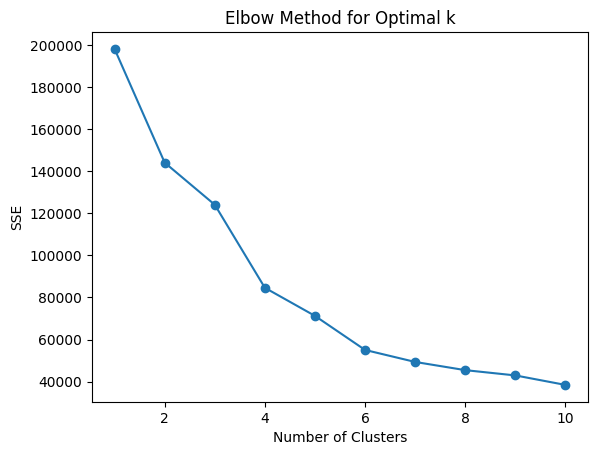

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(scaled_data)

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['dbscan_cluster'] = dbscan.fit_predict(pca_data)

In [ ]:
kmeans_silhouette = silhouette_score(scaled_data, data['kmeans_cluster'])
kmeans_davies_bouldin = davies_bouldin_score(scaled_data, data['kmeans_cluster'])

In [ ]:
print("K-means Silhouette Score:", kmeans_silhouette)
print("K-means Davies-Bouldin Index:", kmeans_davies_bouldin)

K-means Silhouette Score: 0.4717957520747301
K-means Davies-Bouldin Index: 0.8899413430857577


In [ ]:
data['anomaly'] = data['dbscan_cluster'].apply(lambda x: 1 if x == -1 else 0)


In [ ]:
print("Number of anomalies detected:", data['anomaly'].sum())

Number of anomalies detected: 64


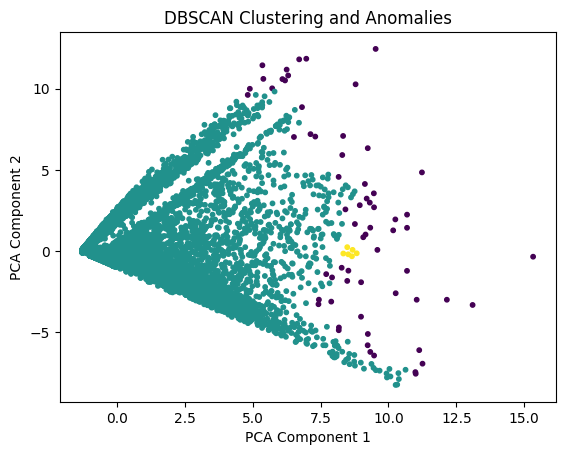

In [ ]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['dbscan_cluster'], cmap='viridis', marker='o', s=10)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering and Anomalies')
plt.show()

In [ ]:
data.to_csv('clustering_anomaly_detection_results.csv', index=False)
print("Results saved to clustering_anomaly_detection_results.csv")

Results saved to clustering_anomaly_detection_results.csv
